In [13]:
import os
import datetime
import string

# define parameters
epochs = 1000
batch_size = 32

# define paths
source_path = os.path.join("..", "data", "dataset_hdf5", "iam_words.hdf5")
output_path = os.path.join("..", "output")
target_path = os.path.join(output_path, "checkpoint_weights_2nd_day.hdf5")
os.makedirs(output_path, exist_ok = True)

# define input size, number max of chars per line and list of valid chars
target_image_size = (256, 64, 1)
maxTextLength = 32
charset = string.printable[:84]
buf_size = 0


print("source:", source_path)
print("output", output_path)
print("target", target_path)
print("charset:", charset)
print("shuffle_buffer_size:", buf_size)

source: ../data/dataset_hdf5/iam_words.hdf5
output ../output
target ../output/checkpoint_weights_2nd_day.hdf5
charset: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@
shuffle_buffer_size: 0


In [14]:
# import data.generator as dg

# train_dgen = dg.create_dataset(source_path,
#                                charset=charset, 
#                                partition='train',
#                                batch_size=batch_size, 
#                                maxTextLength=maxTextLength, 
#                                buf_size = buf_size)

# valid_dgen = dg.create_dataset(source_path,
#                                charset=charset, 
#                                partition='valid',
#                                batch_size=batch_size, 
#                                maxTextLength=maxTextLength)

In [15]:
from model import MyModel

model = MyModel(input_size=target_image_size,
                vocab_size=2+len(charset),
                beam_width=10,
                stop_tolerance=20,
                reduce_tolerance=15,
                top_paths=10)

model.compile(learning_rate=0.001)
# model.summary(output_path, "summary.txt")

model.load_checkpoint(target=target_path)
# callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)

In [16]:
import matplotlib.pyplot as plt
import Preprocess_image as pp
img_path = ["./s.png", "./t.png", "./u.png", "./v.png", "./w.png", "./x.png", "./y.png", "./z.png"]

img1 = pp.preprocess_image(img_path[0], target_image_size)
img2 = pp.preprocess_image(img_path[1], target_image_size)
img3 = pp.preprocess_image(img_path[2], target_image_size)
img4 = pp.preprocess_image(img_path[3], target_image_size)
img5 = pp.preprocess_image(img_path[4], target_image_size)
img6 = pp.preprocess_image(img_path[5], target_image_size)
img7 = pp.preprocess_image(img_path[6], target_image_size)
img8 = pp.preprocess_image(img_path[7], target_image_size)
img = pp.normalization([img1, img2, img3, img4, img5, img6, img7, img8])

predicts, probabilities = model.predict(img, ctc_decode=True)

adding : 0.98241884
quant : 0.3512833
sends : 0.5309153
phasse : 0.3669612
the : 0.99721104
nodes : 0.7598824
commit. : 0.8123186
2-p : 0.5442868


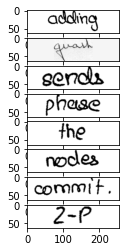

['adding'] ['addding'] ['adling'] ['aldding'] ['ading'] ['odding'] ['addingg'] ['addling'] ['alding'] ['addin'] 
['quant'] ['quart'] ['guant'] ['quast'] ['guart'] ['guast'] ['quanh'] ['qeant'] ['qrant'] ['quarh'] 
['sends'] ['senls'] ['senods'] ['senbs'] ['senols'] ["sen's"] ['senks'] ['send'] ['sendy'] ['senl'] 
['phasse'] ['phesse'] ['phase'] ['phaise'] ['phosse'] ['pharse'] ['Phasse'] ['phese'] ['phose'] ['phass'] 
['the'] ['they'] ['th'] ['te'] ['tha'] ['The'] ['thee'] ['he'] ['thHe'] ['thh'] 
['nodes'] ['noodes'] ['rodes'] ['modes'] ['ndes'] ['noded'] ['nods'] ['noder'] ['noes'] ['node'] 
['commit.'] ['commit'] ['commit-.'] ['commit-'] ['conmit.'] ['comnit.'] ['committ.'] ["commi't."] ['commit.-'] ["comm'it."] 
['2-p'] ['2-P'] ['2-.p'] ['2-.'] ['2-0'] ['2-o'] ['2.-p'] ['2-8'] ['2-.P'] ['2-i'] 


In [17]:
from data.tokenizer import Tokenizer

tokenizer = Tokenizer(filters = string.printable[84:], charset=charset)

for index, (word, prob) in enumerate(zip(tokenizer.sequences_to_texts(predicts), probabilities)):
    print(word,":", prob)
    plt.subplot(811+index)
    plt.imshow(pp.adjust_to_see(img[index]), cmap = "gray")
    
plt.show()
for i in range(8):
    for j in predicts[i]:
        print(tokenizer.sequences_to_texts([[j]]), end=" ")
    print()